In [2]:
pip install pynput

Note: you may need to restart the kernel to use updated packages.


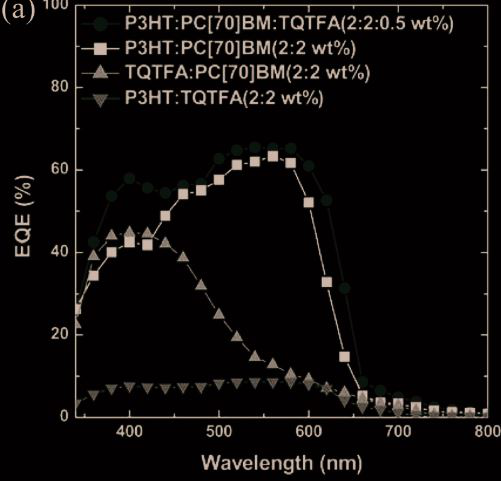

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
img=Image.open('C:/Users/hp/Desktop/img_26.jpg')
img

Click Origin
Click Top Right
Click data points. Right-click to end.


Unhandled exception in listener callback
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 380, in _handler
    converted = self._convert(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 395, in _convert
    raise NotImplementedError()
NotImplementedError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 162, in inner
    return f(self, *args, **kwargs)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 384, in _handler
    self._handle(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\mouse\_win32.py", line 191, in _handle
    self.on_click(data.pt.x, data.pt.y, button, pressed)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 78, in inner
    if f(*args) is False:


Input X-min: 0
Input X-max: 800
Input Y-min: 0
Input Y-max: 100
Origin:     [443, 921]
Top Right:  [1061, 302]
X: [0.0, 34.95, 71.2, 110.03, 143.69, 178.64, 211.0, 247.25, 278.32, 315.86, 350.81, 387.06, 419.42, 456.96, 493.2, 526.86, 559.22, 592.88, 626.54, 665.37, 696.44, 732.69, 768.93]
Y: [18.9, 35.22, 40.23, 41.03, 40.55, 38.61, 35.06, 28.43, 21.0, 15.83, 10.82, 9.05, 6.62, 5.98, 2.91, 2.1, 1.62, 0.0, -0.16, -0.97, -1.78, -2.1, -2.58]


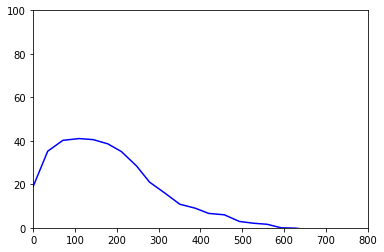

In [2]:
from pynput import mouse

class MyException(Exception):pass

X = []
Y = []
NumberOfMouseClicks = 0
print('Click Origin')

def on_click(x, y, button, pressed):
    button = str(button)
    global NumberOfMouseClicks

    NumberOfMouseClicks = NumberOfMouseClicks + 1
    if NumberOfMouseClicks==1:
        print('Click Top Right')  
    if NumberOfMouseClicks==3:
        print('Click data points. Right-click to end.')

    X.append(x)
    Y.append(y)

    if button!='Button.left':
        raise MyException(button)


def plot_data(X, Y, Xmin, Xmax, Ymin, Ymax):
    import matplotlib.pyplot as plt

    plt.plot(X,Y,'b-')
    plt.xlim((Xmin, Xmax))
    plt.ylim((Ymin, Ymax))
    plt.show() 


def main(X,Y):
    with mouse.Listener(on_click=on_click) as listener:
        try:
            listener.join()
        except MyException as e:
            pass

    # drop duplicates
    X = X[::2]
    Y = Y[::2]

    # input boundaries
    Xmin = float(input('Input X-min: '))
    Xmax = float(input('Input X-max: '))
    Ymin = float(input('Input Y-min: '))
    Ymax = float(input('Input Y-max: '))

    # define scales from data
    origin = [X[0],Y[0]]
    topRight = [X[1],Y[1]]
    XminScale = origin[0]
    XmaxScale = topRight[0]
    YminScale = origin[1]
    YmaxScale = topRight[1]

    # drop extras
    X = X[2:-1]
    Y = Y[2:-1]

    # scale
    ## (old_value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    Xplot = [(i - XminScale) / (XmaxScale - XminScale) * (Xmax - Xmin) + Xmin for i in X]
    Yplot = [(i - YminScale) / (YmaxScale - YminScale) * (Ymax - Ymin) + Ymin for i in Y]

    # print outputs
    print('Origin:     {}'.format([round(i, 2) for i in origin]))
    print('Top Right:  {}'.format([round(i, 2) for i in topRight]))
    print('X: {}'.format([round(i, 2) for i in Xplot]))
    print('Y: {}'.format([round(i, 2) for i in Yplot]))

    # plot
    plot_data(Xplot, Yplot, Xmin, Xmax, Ymin, Ymax)


if __name__ == '__main__':
    main(X,Y)

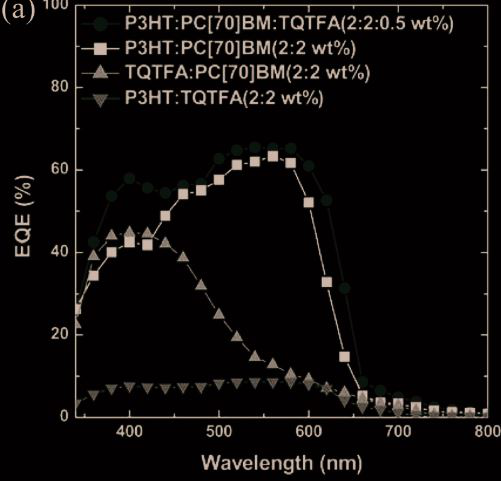

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
img=Image.open('C:/Users/hp/Desktop/img_26.jpg')
img

Click Origin
Click Top Right
Click data points. Right-click to end.


Unhandled exception in listener callback
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 380, in _handler
    converted = self._convert(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 395, in _convert
    raise NotImplementedError()
NotImplementedError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 162, in inner
    return f(self, *args, **kwargs)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 384, in _handler
    self._handle(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\mouse\_win32.py", line 191, in _handle
    self.on_click(data.pt.x, data.pt.y, button, pressed)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 78, in inner
    if f(*args) is False:


Input X-min: 0
Input X-max: 800
Input Y-min: 0
Input Y-max: 100
Origin:     [444, 929]
Top Right:  [1060, 312]
X: [-1.3, 35.06, 67.53, 106.49, 137.66, 176.62, 207.79, 242.86, 279.22, 314.29, 350.65, 385.71, 420.78, 458.44, 492.21, 524.68, 557.14, 590.91, 632.47, 666.23, 700.0, 729.87, 767.53]
Y: [8.91, 11.67, 12.8, 12.8, 12.8, 12.48, 12.97, 13.13, 13.45, 14.1, 14.42, 14.1, 14.26, 13.45, 12.16, 9.89, 8.27, 7.62, 6.65, 6.48, 6.16, 6.16, 6.16]


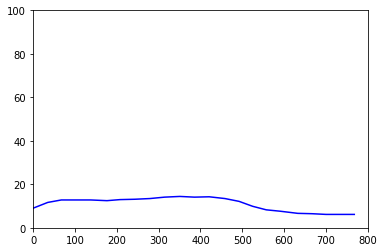

In [4]:
from pynput import mouse

class MyException(Exception):pass

X = []
Y = []
NumberOfMouseClicks = 0
print('Click Origin')

def on_click(x, y, button, pressed):
    button = str(button)
    global NumberOfMouseClicks

    NumberOfMouseClicks = NumberOfMouseClicks + 1
    if NumberOfMouseClicks==1:
        print('Click Top Right')  
    if NumberOfMouseClicks==3:
        print('Click data points. Right-click to end.')

    X.append(x)
    Y.append(y)

    if button!='Button.left':
        raise MyException(button)


def plot_data(X, Y, Xmin, Xmax, Ymin, Ymax):
    import matplotlib.pyplot as plt

    plt.plot(X,Y,'b-')
    plt.xlim((Xmin, Xmax))
    plt.ylim((Ymin, Ymax))
    plt.show() 


def main(X,Y):
    with mouse.Listener(on_click=on_click) as listener:
        try:
            listener.join()
        except MyException as e:
            pass

    # drop duplicates
    X = X[::2]
    Y = Y[::2]

    # input boundaries
    Xmin = float(input('Input X-min: '))
    Xmax = float(input('Input X-max: '))
    Ymin = float(input('Input Y-min: '))
    Ymax = float(input('Input Y-max: '))

    # define scales from data
    origin = [X[0],Y[0]]
    topRight = [X[1],Y[1]]
    XminScale = origin[0]
    XmaxScale = topRight[0]
    YminScale = origin[1]
    YmaxScale = topRight[1]

    # drop extras
    X = X[2:-1]
    Y = Y[2:-1]

    # scale
    ## (old_value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    Xplot = [(i - XminScale) / (XmaxScale - XminScale) * (Xmax - Xmin) + Xmin for i in X]
    Yplot = [(i - YminScale) / (YmaxScale - YminScale) * (Ymax - Ymin) + Ymin for i in Y]

    # print outputs
    print('Origin:     {}'.format([round(i, 2) for i in origin]))
    print('Top Right:  {}'.format([round(i, 2) for i in topRight]))
    print('X: {}'.format([round(i, 2) for i in Xplot]))
    print('Y: {}'.format([round(i, 2) for i in Yplot]))

    # plot
    plot_data(Xplot, Yplot, Xmin, Xmax, Ymin, Ymax)


if __name__ == '__main__':
    main(X,Y)

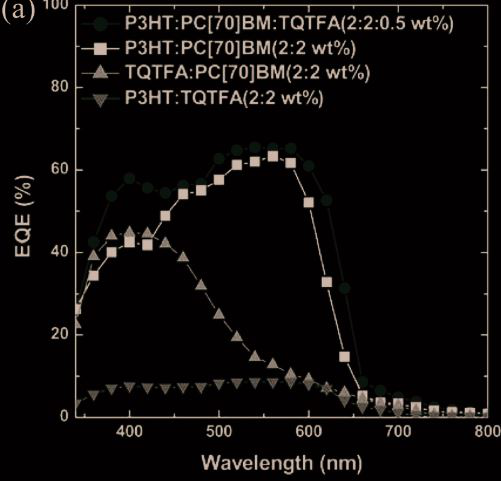

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
img=Image.open('C:/Users/hp/Desktop/img_26.jpg')
img

Click Origin
Click Top Right
Click data points. Right-click to end.


Unhandled exception in listener callback
Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 380, in _handler
    converted = self._convert(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 395, in _convert
    raise NotImplementedError()
NotImplementedError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 162, in inner
    return f(self, *args, **kwargs)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\win32.py", line 384, in _handler
    self._handle(code, msg, lpdata)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\mouse\_win32.py", line 191, in _handle
    self.on_click(data.pt.x, data.pt.y, button, pressed)
  File "C:\Users\hp\Anaconda3\lib\site-packages\pynput\_util\__init__.py", line 78, in inner
    if f(*args) is False:


Input X-min: 0
Input X-max: 800
Input Y-min: 0
Input Y-max: 100
Origin:     [445, 957]
Top Right:  [1061, 339]
X: [-2.6, 31.17, 67.53, 102.6, 138.96, 176.62, 207.79, 244.16, 275.32, 312.99, 349.35, 380.52, 418.18, 453.25, 488.31, 524.68, 557.14, 588.31, 627.27, 662.34, 693.51, 727.27, 764.94]
Y: [25.24, 33.01, 39.16, 41.1, 40.94, 47.9, 52.75, 53.56, 56.63, 60.19, 61.17, 62.14, 60.52, 50.97, 31.55, 13.43, 4.85, 2.91, 2.27, 1.29, 0.65, 0.65, 0.16]


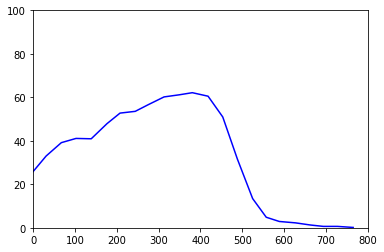

In [6]:
from pynput import mouse

class MyException(Exception):pass

X = []
Y = []
NumberOfMouseClicks = 0
print('Click Origin')

def on_click(x, y, button, pressed):
    button = str(button)
    global NumberOfMouseClicks

    NumberOfMouseClicks = NumberOfMouseClicks + 1
    if NumberOfMouseClicks==1:
        print('Click Top Right')  
    if NumberOfMouseClicks==3:
        print('Click data points. Right-click to end.')

    X.append(x)
    Y.append(y)

    if button!='Button.left':
        raise MyException(button)


def plot_data(X, Y, Xmin, Xmax, Ymin, Ymax):
    import matplotlib.pyplot as plt

    plt.plot(X,Y,'b-')
    plt.xlim((Xmin, Xmax))
    plt.ylim((Ymin, Ymax))
    plt.show() 


def main(X,Y):
    with mouse.Listener(on_click=on_click) as listener:
        try:
            listener.join()
        except MyException as e:
            pass

    # drop duplicates
    X = X[::2]
    Y = Y[::2]

    # input boundaries
    Xmin = float(input('Input X-min: '))
    Xmax = float(input('Input X-max: '))
    Ymin = float(input('Input Y-min: '))
    Ymax = float(input('Input Y-max: '))

    # define scales from data
    origin = [X[0],Y[0]]
    topRight = [X[1],Y[1]]
    XminScale = origin[0]
    XmaxScale = topRight[0]
    YminScale = origin[1]
    YmaxScale = topRight[1]

    # drop extras
    X = X[2:-1]
    Y = Y[2:-1]

    # scale
    ## (old_value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    Xplot = [(i - XminScale) / (XmaxScale - XminScale) * (Xmax - Xmin) + Xmin for i in X]
    Yplot = [(i - YminScale) / (YmaxScale - YminScale) * (Ymax - Ymin) + Ymin for i in Y]

    # print outputs
    print('Origin:     {}'.format([round(i, 2) for i in origin]))
    print('Top Right:  {}'.format([round(i, 2) for i in topRight]))
    print('X: {}'.format([round(i, 2) for i in Xplot]))
    print('Y: {}'.format([round(i, 2) for i in Yplot]))

    # plot
    plot_data(Xplot, Yplot, Xmin, Xmax, Ymin, Ymax)


if __name__ == '__main__':
    main(X,Y)